In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Signup=pd.read_csv("takehome_users.csv", encoding='latin-1')

In [4]:
Signup

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [5]:
usage=pd.read_csv("takehome_user_engagement.csv",encoding='latin-1')
years=pd.to_datetime(usage["time_stamp"]).dt.year
Week=pd.to_datetime(usage["time_stamp"]).dt.week
day=pd.to_datetime(usage["time_stamp"]).dt.day
usage['years'] = years
usage['week'] = Week

usage

/var/folders/mz/69ry24wj6p17r45gmjms3lqr0000gn/T/ipykernel_41589/3618535532.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Week=pd.to_datetime(usage["time_stamp"]).dt.week


,time_stamp,user_id,visited,years,week
0,2014-04-22 03:53:30,1,1,2014,17
1,2013-11-15 03:45:04,2,1,2013,46
2,2013-11-29 03:45:04,2,1,2013,48
3,2013-12-09 03:45:04,2,1,2013,50
4,2013-12-25 03:45:04,2,1,2013,52
...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013,36
207913,2013-01-15 18:28:37,11997,1,2013,3
207914,2014-04-27 12:45:16,11998,1,2014,17
207915,2012-06-02 11:55:59,11999,1,2012,22


In [6]:
D=usage.user_id.unique()
L=D.tolist()

In [7]:
L=[]
Visits=usage["user_id"].value_counts()
VCDF=pd.DataFrame(Visits)
Col=["count"]
VCDF.columns=Col
Countsl=VCDF['count']

USERS=Visits.index.array
Countslist=Countsl.tolist()
for i in Countslist:
    L.append(int(i))


In [8]:
#Getting Data of users and the number of times used
dict={'User_id':USERS,'Counts':L}
CUSAGE=pd.DataFrame(dict)
CUSAGE

,User_id,Counts
0,3623,606
1,906,600
2,1811,593
3,7590,590
4,8068,585
...,...,...
8818,4699,1
8819,4698,1
8820,4697,1
8821,4696,1


In [9]:
#Getting all the users who used the app 3 times or more
ReqCUSAGE=CUSAGE[CUSAGE['Counts']>=3]

In [10]:
M=ReqCUSAGE["User_id"]
V=[]
for i in M:
    V.append(i)
V.sort()
len(V)

User_list=V

In [11]:
for i in V:
    print(usage.loc[usage['user_id'] == i])


             time_stamp  user_id  visited  years  week
1   2013-11-15 03:45:04        2        1   2013    46
2   2013-11-29 03:45:04        2        1   2013    48
3   2013-12-09 03:45:04        2        1   2013    50
4   2013-12-25 03:45:04        2        1   2013    52
5   2013-12-31 03:45:04        2        1   2013     1
6   2014-01-08 03:45:04        2        1   2014     2
7   2014-02-03 03:45:04        2        1   2014     6
8   2014-02-08 03:45:04        2        1   2014     6
9   2014-02-09 03:45:04        2        1   2014     6
10  2014-02-13 03:45:04        2        1   2014     7
11  2014-02-16 03:45:04        2        1   2014     7
12  2014-03-09 03:45:04        2        1   2014    10
13  2014-03-13 03:45:04        2        1   2014    11
14  2014-03-31 03:45:04        2        1   2014    14
              time_stamp  user_id  visited  years  week
20   2013-01-16 22:08:03       10        1   2013     3
21   2013-01-22 22:08:03       10        1   2013     4
22   20

In [12]:
usage['years'].unique()
Yearslist=[2012,2013,2014]

weekslist=usage['week'].unique().tolist()
weekslist.sort()
weekslist
cou_nt=0
userslisttotal=usage['user_id'].tolist()
yearslisttotal=usage['years'].tolist()
weeklisttotal=usage['week'].tolist()

In [13]:
usage.groupby(['user_id','week']).sum().head(60)

visited  years
user_id week                
1       17          1   2014
2       1           1   2013
        2           1   2014
        6           3   6042
        7           2   4028
        10          1   2014
        11          1   2014
        14          1   2014
        46          1   2013
        48          1   2013
        50          1   2013
        52          1   2013
3       12          1   2013
4       21          1   2013
5       4           1   2013
6       51          1   2013
7       51          1   2012
10      1           5  10069
        2           4   8056
        3           7  14097
        4           7  14097
        5           7  14097
        6           5  10068
        7           8  16110
        8           8  16111
        9          10  20137
        10          9  18124
        11          9  18124
        12          9  18124
        13          8  16111
        14          7  14097
        15          8  16109
        16          9  18124
        17          7  14095
        18          9  18122
        19         12  24163
        20         10  20137
        21          9  18124
        22          9  18124
        23          6  12080
        24          5  10065
        25          3   6039
        26          3   6039
        27          4   8052
        28          3   6039
        29          5  10065
        30          4   8052
        31          5  10065
        32          3   6039
        33          2   4026
        34          4   8052
        35          6  12078
        36          4   8052
        37          5  10065
        38          3   6039
        39          2   4026
        40          4   8052
        41          3   6039
        42          2   4026
        43          4   8052

In [14]:
USAGENEWDF=usage.groupby(['user_id','week']).sum().reset_index()
USAGENEWDF

,user_id,week,visited,years
0,1,17,1,2014
1,2,1,1,2013
2,2,2,1,2014
3,2,6,3,6042
4,2,7,2,4028
...,...,...,...,...
57167,11996,36,1,2013
57168,11997,3,1,2013
57169,11998,17,1,2014
57170,11999,22,1,2012


In [15]:
USERS=[]
User=[]
for i in User_list:
    USERS.append((USAGENEWDF[(USAGENEWDF['user_id']==i)&(USAGENEWDF['visited']>=3)])["user_id"].unique())
for i in USERS:
    User.append((i.tolist()))
User
Users=[]
for i in User:
    for j in i:
        Users.append(i)

In [16]:
#getting list of Adopted users:
import itertools
AdoptedUsers = list(itertools.chain(*Users))
AdoptedUsers

[2,
 10,
 20,
 33,
 42,
 43,
 53,
 63,
 69,
 74,
 80,
 81,
 82,
 87,
 133,
 135,
 141,
 146,
 153,
 160,
 165,
 168,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 322,
 341,
 351,
 363,
 370,
 383,
 401,
 418,
 430,
 445,
 450,
 462,
 469,
 471,
 472,
 479,
 483,
 492,
 494,
 497,
 509,
 510,
 512,
 518,
 522,
 529,
 535,
 540,
 547,
 553,
 564,
 572,
 589,
 601,
 603,
 605,
 618,
 627,
 628,
 632,
 634,
 639,
 669,
 679,
 680,
 724,
 725,
 728,
 754,
 772,
 783,
 786,
 804,
 828,
 845,
 851,
 869,
 874,
 882,
 885,
 901,
 906,
 907,
 912,
 928,
 932,
 934,
 937,
 943,
 953,
 980,
 985,
 1007,
 1009,
 1013,
 1017,
 1018,
 1027,
 1035,
 1055,
 1061,
 1072,
 1089,
 1093,
 1094,
 1099,
 1106,
 1107,
 1119,
 1124,
 1128,
 1129,
 1136,
 1145,
 1150,
 1151,
 1155,
 1156,
 1163,
 1173,
 1186,
 1196,
 1202,
 1214,
 1233,
 1235,
 1238,
 1242,
 1245,
 1250,
 1274,
 1280,
 1290,
 1318,
 1319,
 1320,
 1327,
 133

In [17]:
#for j in AdoptedUsers:
usage.loc[usage["user_id"].isin(AdoptedUsers)]
    #df.loc[df['col1'].isin([value1, value2, value3, ...])]


,time_stamp,user_id,visited,years,week
1,2013-11-15 03:45:04,2,1,2013,46
2,2013-11-29 03:45:04,2,1,2013,48
3,2013-12-09 03:45:04,2,1,2013,50
4,2013-12-25 03:45:04,2,1,2013,52
5,2013-12-31 03:45:04,2,1,2013,1
...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,2014,21
207899,2014-05-24 11:04:47,11988,1,2014,21
207900,2014-05-26 11:04:47,11988,1,2014,22
207901,2014-05-27 11:04:47,11988,1,2014,22


In [18]:
Signup #original dataset
    

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [19]:
SIGNUPUSERSWHOUSED=pd.DataFrame(Signup.loc[Signup["object_id"].isin(AdoptedUsers)])

In [20]:
SIGNUPUSERSWHOUSED  #data of users who adopted

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN
32,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
...,...,...,...,...,...,...,...,...,...,...
11964,11965,2014-04-25 07:17:35,Storey Lewis,LewisStorey@cuvox.de,GUEST_INVITE,1.400657e+09,0,0,65,11251.0
11966,11967,2014-01-12 08:12:37,Barbosa Pedro,PedroFernandesBarbosa@gmail.com,GUEST_INVITE,1.401524e+09,0,0,15,5688.0
11968,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,1.401411e+09,1,1,52,6647.0
11974,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0


In [28]:
Z=[]
M={}
for i in range(1,12001):
    if i in AdoptedUsers:
        Z.append(1)
    else:
        Z.append(0)
  
M={"Adopted":Z}
print(M)

{'Adopted': [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
Y=pd.DataFrame(M)
Y.shape

(12000, 1)

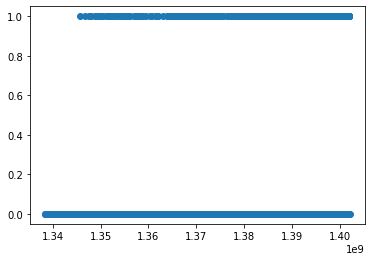

In [30]:
#prediction the higher the last creation time over 1.345*1e9,the more more probability the user will join again
x=Signup['last_session_creation_time']
X=np.array(x).reshape(-1,1)
plt.scatter(X,Y)

In [31]:
Signup

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [33]:
Signup["Adopted"]=Z

<AxesSubplot:ylabel='Adopted'>

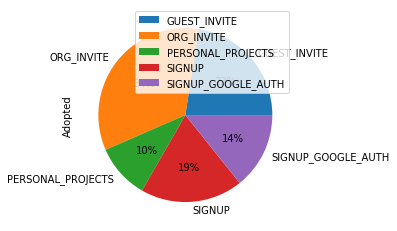

In [34]:
Signup.groupby(['creation_source']).sum().plot(kind='pie', y='Adopted',autopct='%1.0f%%')

<AxesSubplot:ylabel='Adopted'>

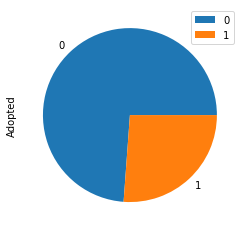

In [36]:
Signup.groupby(['opted_in_to_mailing_list']).sum().plot(kind='pie', y='Adopted')

<AxesSubplot:ylabel='Adopted'>

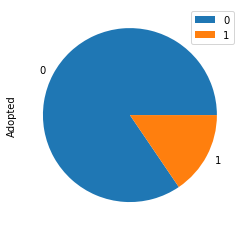

In [38]:
Signup.groupby(['enabled_for_marketing_drip']).sum().plot(kind='pie', y='Adopted')